### Chatbot history

https://chatgpt.com/share/67400442-0258-800c-88fa-859a9f4fcd46

### 1.

A Classification Decision Tree is an algorithm used for classification problems, where the goal is to assign input data into one of several predefined categories. It works by splitting the dataset into subsets based on feature values. The result is a tree-like structure with branches representing decisions and leaves corresponding to output classes.

Classification Decision Trees address problems where the target variable is categorical and the relationships between features and outcomes are non-linear or involve complex decision boundaries. Some Real-World Applications include Medical Diagnosis, Customer Segmentation, Fraud Detection, and Loan Approval

A Classification Decision Tree makes predictions by traversing the tree from the root to a leaf node, following decision rules at each node based on feature values. The leaf node provides the predicted class (or probabilities for each class in some implementations). AMultiple Linear Regression predicts a continuous numerical value by calculating a weighted sum of input features plus a bias term: y=β0+β1x1+β2x2+…+βnxn

In summary, Classification Decision Trees are ideal for problems requiring categorical predictions and non-linear relationships, while Multiple Linear Regression is suited for problems requiring continuous predictions and linear relationships

### 2.

Accuracy is appropriate when the dataset is balanced (similar numbers of positive and negative examples) and when the costs of false positives and false negatives are comparable.
Sensitivity is important when identifying all true positives is crucial, even at the expense of some false positives.
Use specificity when it’s important to minimize false positives, especially when the cost of a false positive is high.
Use precision when false positives are more problematic than false negatives.

### 3.

In [6]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove the specified columns
columns_to_remove = ["Weight_oz", "Width", "Height"]
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')

# Step 2: Drop rows with missing values
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Use .copy() to avoid SettingWithCopyWarning

# Step 3: Set the specified data types using .loc
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype('category')

# Verify the cleaned dataset
print(ab_reduced_noNaN.info())
ab


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None


,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


### 4.

In [7]:
from sklearn.model_selection import train_test_split

# Perform an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Print the number of observations in each set
print(f"Training set size: {ab_reduced_noNaN_train.shape[0]}")
print(f"Testing set size: {ab_reduced_noNaN_test.shape[0]}")


Training set size: 255
Testing set size: 64


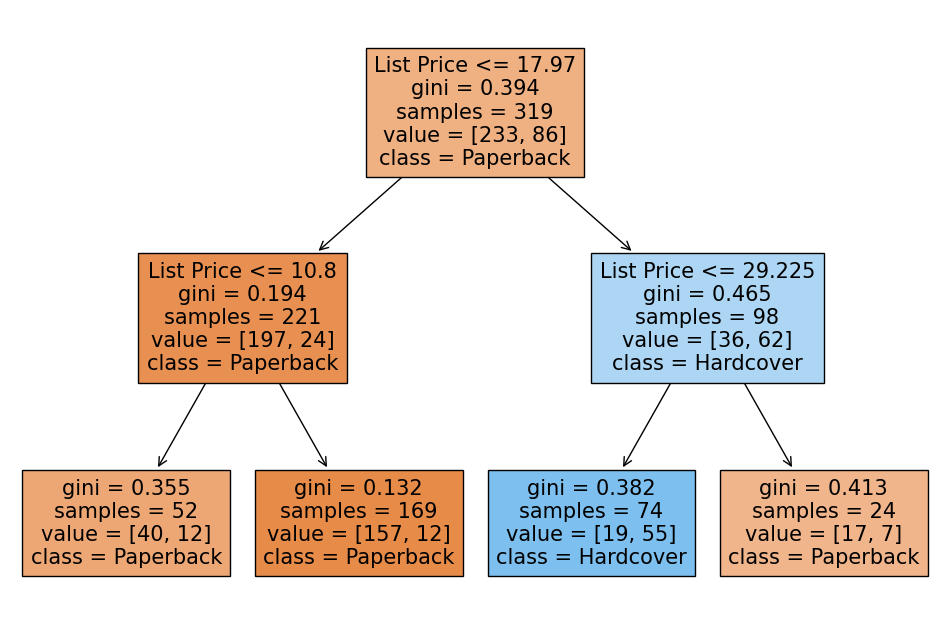

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Create target (y) and feature (X) variables
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Step 2: Initialize and train the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Step 3: Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


The decision tree shows the rules based on List Price for classifying books:
At each node, the model splits the data based on a threshold for List Price.
Each leaf node predicts whether a book is hardcover (H=1) or paperback (H=0).

### 5.

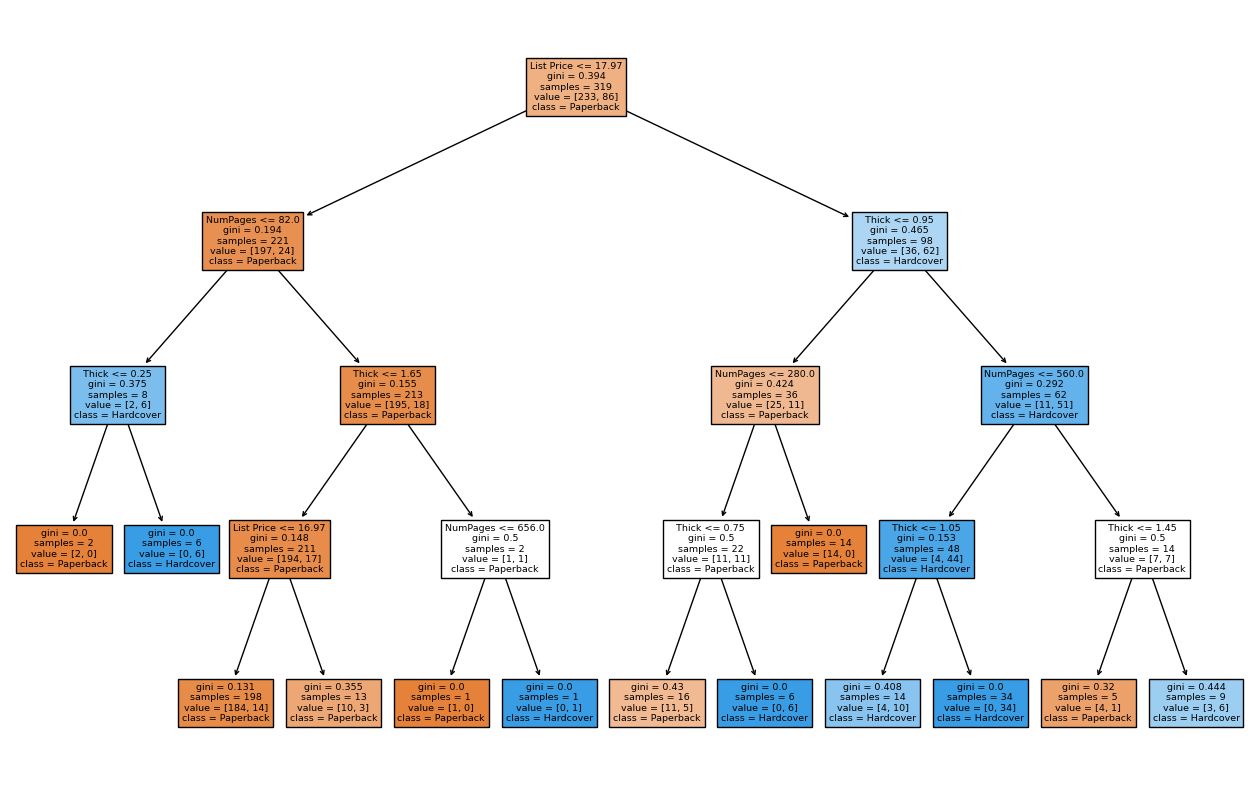

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Create target (y) and feature (X) variables
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Step 2: Initialize and train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Step 3: Plot the decision tree
plt.figure(figsize=(16, 10))
tree.plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True
)
plt.show()


The model traverses the decision tree from the root to a leaf node, using the feature thresholds to decide the path at each node.
At a leaf node, the majority class of the samples in that node determines the prediction.

### 6.

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Prepare test data
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Step 2: Predict using clf and clf2
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Step 3: Calculate confusion matrices
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Step 4: Define a function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)  # Recall for the positive class
    specificity = tn / (tn + fp)  # Recall for the negative class
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return sensitivity, specificity, accuracy

# Step 5: Compute metrics for both models
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(conf_matrix_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(conf_matrix_clf2)

# Step 6: Print results
print("Model clf Metrics:")
print(f"Confusion Matrix:\n{conf_matrix_clf}")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nModel clf2 Metrics:")
print(f"Confusion Matrix:\n{conf_matrix_clf2}")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Model clf Metrics:
Confusion Matrix:
[[40  4]
 [ 3 17]]
Sensitivity: 0.85
Specificity: 0.91
Accuracy: 0.89

Model clf2 Metrics:
Confusion Matrix:
[[42  2]
 [ 2 18]]
Sensitivity: 0.90
Specificity: 0.95
Accuracy: 0.94


### 7.

In the first confusion matrix predictions are made using only the List Price feature. While in the second confusion matrix
predictions are made using three features: NumPages, Thick, and List Price. The confusion matrices for clf and clf2 on the test set are better as they reflect real-world performance and make use of properly tuned features and model complexity.
   

### 8.

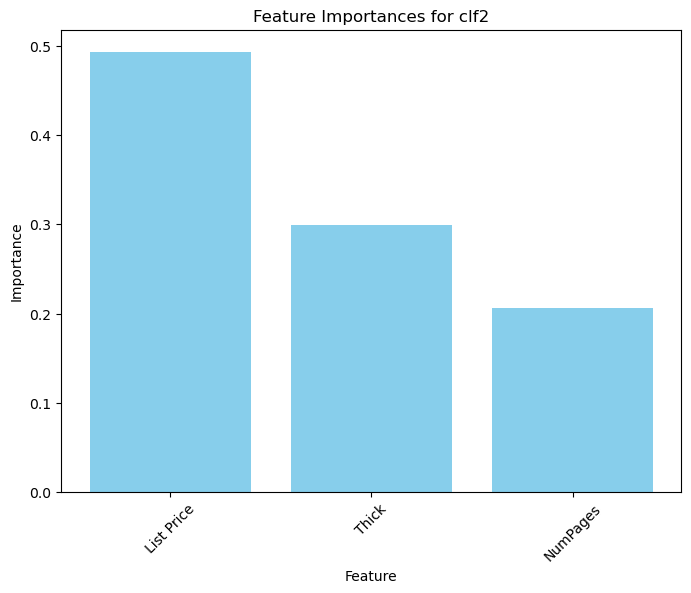

The most important feature is: List Price


In [11]:
# Extract feature importances
feature_importances = clf2.feature_importances_

# Corresponding feature names
feature_names = clf2.feature_names_in_

# Create a visualization of feature importances
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
plt.bar(
    np.array(feature_names)[sorted_indices], 
    feature_importances[sorted_indices], 
    color="skyblue"
)
plt.title("Feature Importances for clf2")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

# Identify the most important predictor
most_important_feature = feature_names[np.argmax(feature_importances)]
print(f"The most important feature is: {most_important_feature}")


### 9.

In linear regression, coefficients directly quantify relationships and are interpretable as marginal effects.
In decision trees, feature importances indicate which features are most influential but lack direct, interpretable numeric effects like regression coefficients.

### 10.

yes